In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import io

In [9]:
try:
    df = pd.read_csv('heart.csv')
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please ensure the file is in the correct directory.")
    exit()

X = df.drop('target', axis=1)
y = df['target']
feature_names = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("--- Data Loading and Preparation Complete ---")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print("\n")

--- Data Loading and Preparation Complete ---
Training set shape: (717, 13)
Test set shape: (308, 13)




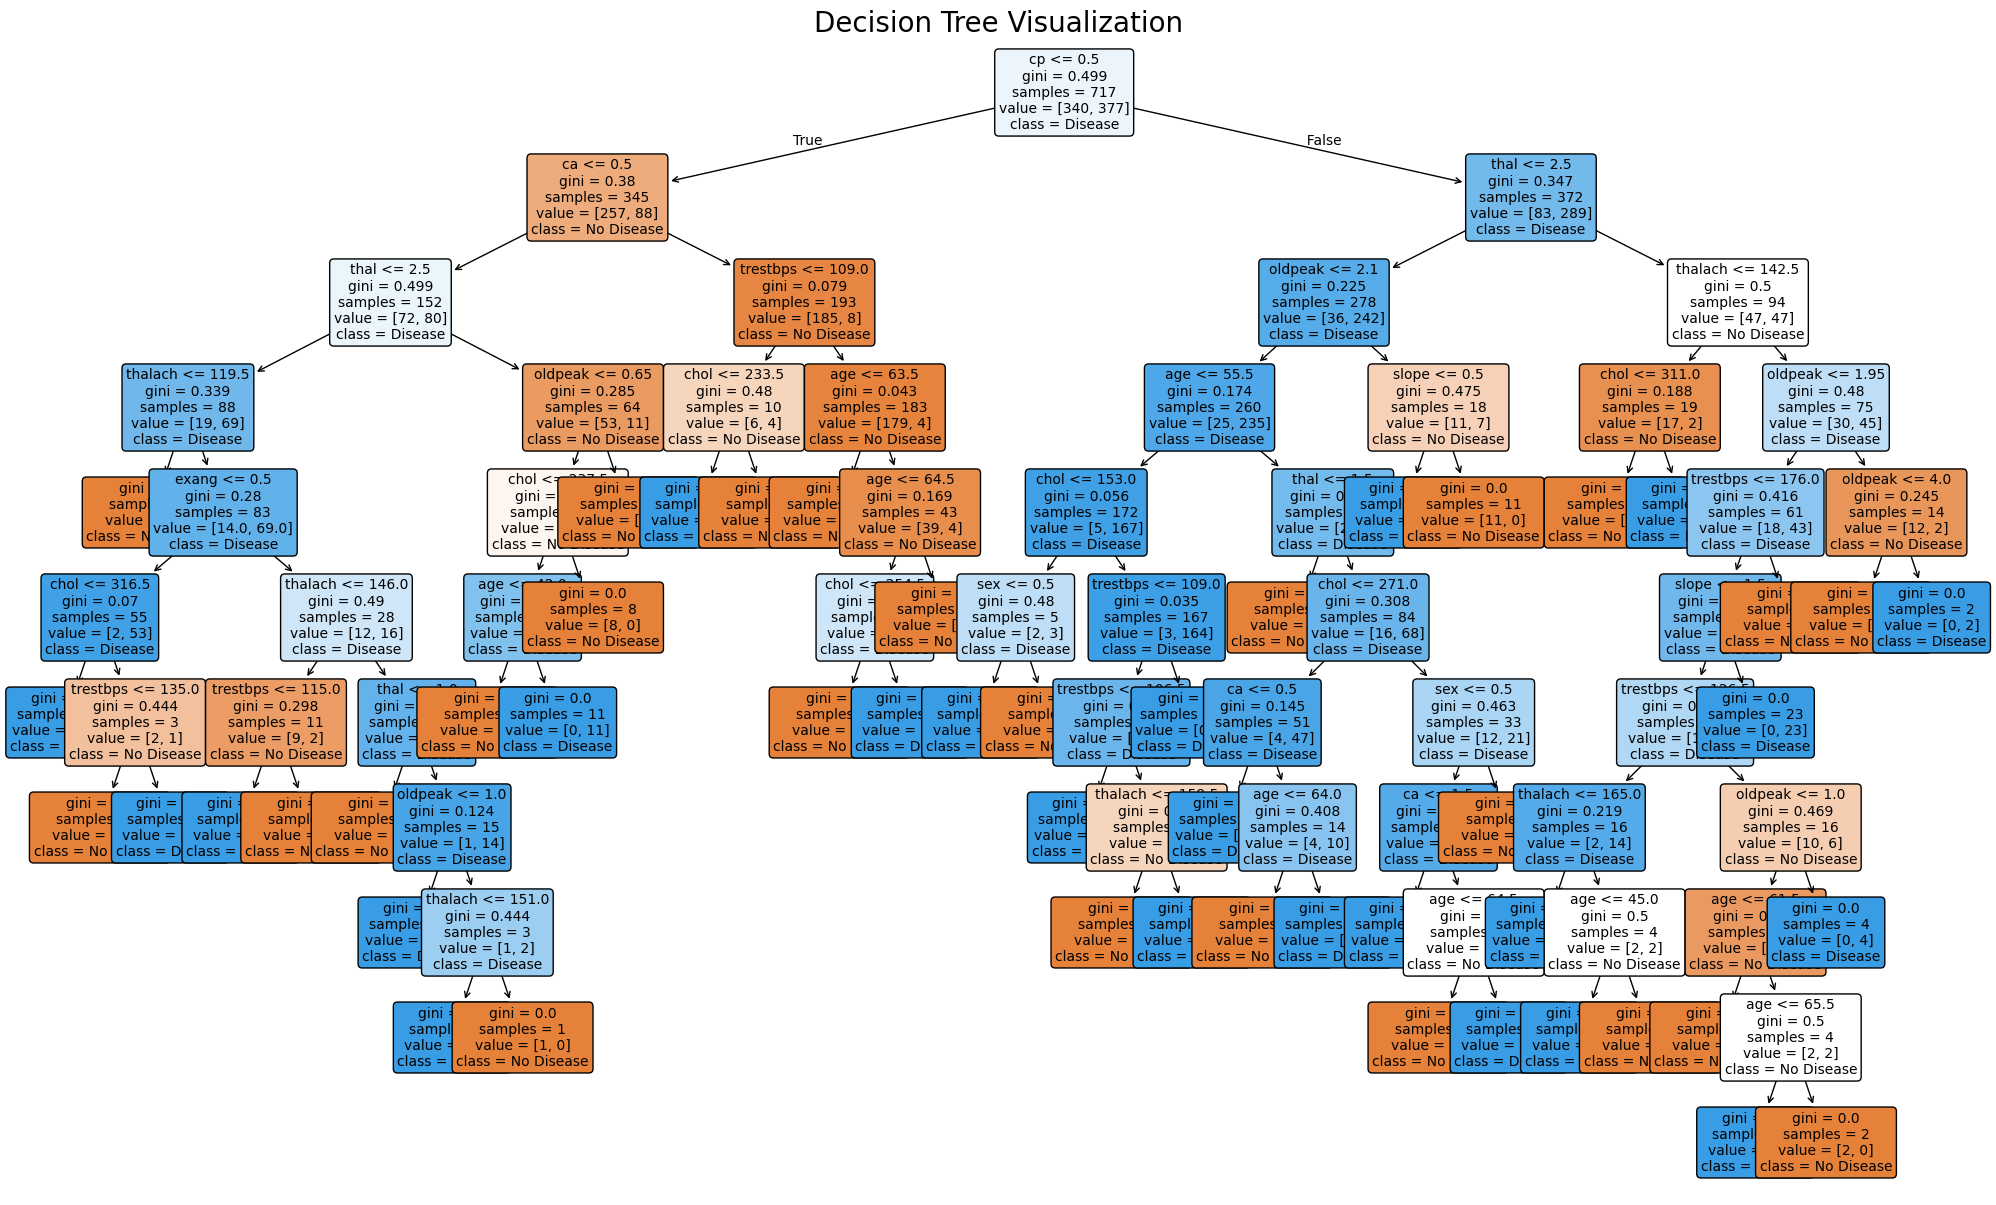

--- Decision Tree Trained and Visualized ---
Initial Decision Tree Accuracy (unpruned): 0.9708




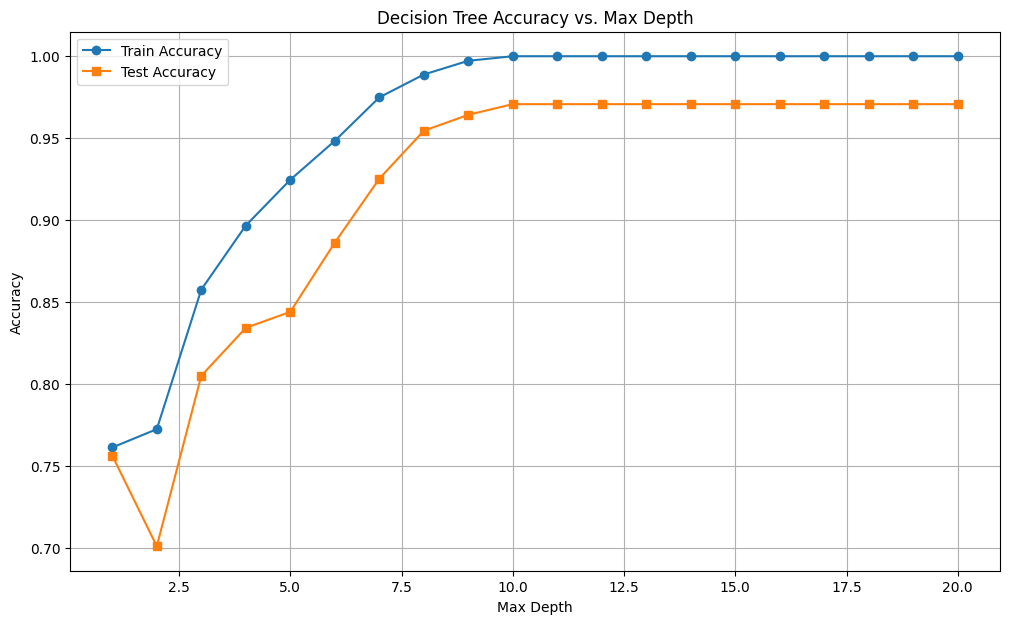

--- Overfitting Analysis Complete ---
The optimal max_depth for the Decision Tree is: 10
Highest test accuracy for Decision Tree: 0.9708




In [10]:

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

plt.figure(figsize=(25, 15))
plot_tree(dt_classifier,
          filled=True,
          feature_names=feature_names,
          class_names=['No Disease', 'Disease'],
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization", fontsize=20)
plt.show()

print("--- Decision Tree Trained and Visualized ---")
dt_initial_accuracy = accuracy_score(y_test, dt_classifier.predict(X_test))
print(f"Initial Decision Tree Accuracy (unpruned): {dt_initial_accuracy:.4f}")
print("\n")

max_depths = range(1, 21)
train_accuracy = []
test_accuracy = []

for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    train_accuracy.append(accuracy_score(y_train, clf.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, clf.predict(X_test)))

plt.figure(figsize=(12, 7))
plt.plot(max_depths, train_accuracy, 'o-', label='Train Accuracy')
plt.plot(max_depths, test_accuracy, 's-', label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.grid(True)
plt.legend()
plt.show()

optimal_depth = test_accuracy.index(max(test_accuracy)) + 1
print("--- Overfitting Analysis Complete ---")
print(f"The optimal max_depth for the Decision Tree is: {optimal_depth}")
print(f"Highest test accuracy for Decision Tree: {max(test_accuracy):.4f}")
print("\n")


In [14]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("--- Random Forest Training and Comparison Complete ---")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"Decision Tree Accuracy: {max(test_accuracy):.4f}")
print("\n")

--- Random Forest Training and Comparison Complete ---
Random Forest Accuracy: 0.9805
Decision Tree Accuracy: 0.9708




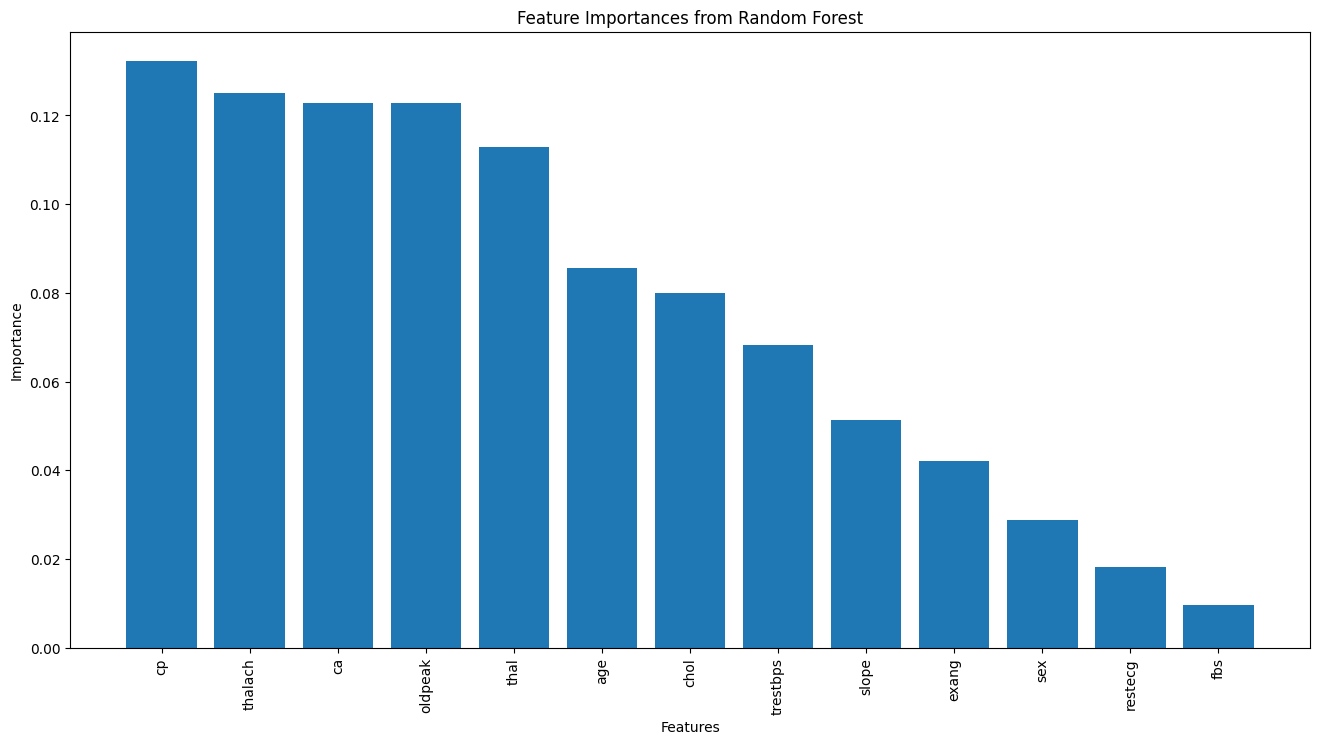

--- Feature Importance Analysis Complete ---
Top 5 most important features:
    Feature  Importance
2        cp    0.132274
7   thalach    0.125039
11       ca    0.122912
9   oldpeak    0.122852
12     thal    0.113005




In [12]:

importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(16, 8))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances from Random Forest')
plt.show()

print("--- Feature Importance Analysis Complete ---")
print("Top 5 most important features:")
print(feature_importance_df.head())
print("\n")


In [16]:

dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)

cv_scores_dt = cross_val_score(dt_optimal, X, y, cv=5)
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=5)

print("--- Cross-Validation Evaluation Complete ---")
print("Decision Tree (Optimal Depth) - 5-Fold Cross-Validation Scores:")
print(f"Scores: {cv_scores_dt}")
print(f"Mean Accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")
print("\n")
print("Random Forest - 5-Fold Cross-Validation Scores:")
print(f"Scores: {cv_scores_rf}")
print(f"Mean Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")


from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

dt_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)

cv_scores_dt = cross_val_score(dt_optimal, X, y, cv=cv_strategy)
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=cv_strategy)

print("--- Fully Reproducible Cross-Validation Evaluation ---")
print("Decision Tree (Optimal Depth) - 5-Fold Cross-Validation Scores:")
print(f"Scores: {cv_scores_dt}")
print(f"Mean Accuracy: {cv_scores_dt.mean():.4f} (+/- {cv_scores_dt.std() * 2:.4f})")
print("\n")
print("Random Forest - 5-Fold Cross-Validation Scores:")
print(f"Scores: {cv_scores_rf}")
print(f"Mean Accuracy: {cv_scores_rf.mean():.4f} (+/- {cv_scores_rf.std() * 2:.4f})")

--- Cross-Validation Evaluation Complete ---
Decision Tree (Optimal Depth) - 5-Fold Cross-Validation Scores:
Scores: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000 (+/- 0.0000)


Random Forest - 5-Fold Cross-Validation Scores:
Scores: [1.         1.         1.         1.         0.98536585]
Mean Accuracy: 0.9971 (+/- 0.0117)
--- Fully Reproducible Cross-Validation Evaluation ---
Decision Tree (Optimal Depth) - 5-Fold Cross-Validation Scores:
Scores: [1.        1.        1.        0.9902439 1.       ]
Mean Accuracy: 0.9980 (+/- 0.0078)


Random Forest - 5-Fold Cross-Validation Scores:
Scores: [1.        1.        1.        0.9804878 1.       ]
Mean Accuracy: 0.9961 (+/- 0.0156)
